# Visualizing data with matplotlib

Somtimes graphs provide the best way to visualize data

The **matplotlib** library allows you to draw graphs to help with visualization

If we want to visualize data, we will need to load some data into a DataFrame

In [2]:
import pandas as pd

In [3]:
# Load our data from the csv file
delays_df = pd.read_csv('Lots_of_flight_data.csv') 

In order to display plots we need to import the **matplotlib** library

In [1]:
import matplotlib.pyplot as plt

A common plot used in data science is the scatter plot for checking the relationship between two columns
If you see dots scattered everywhere,  there is no correlation between the two columns
If you see somethign resembling a line, there is a correlation between the two columns

You can use the plot method of the DataFrame to draw the scatter plot
* kind - the type of graph to draw
* x - value to plot as x
* y - value to plot as y
* color - color to use for the graph points
* alpha - opacity - useful to show density of points in a scatter plot
* title - title of the graph

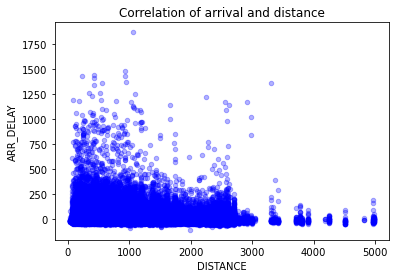

In [21]:
#Check if there is a relationship between the distance of a flight and how late the flight arrives
delays_df.plot(
               kind='scatter',
               x='DISTANCE',
               y='ARR_DELAY',
               color='blue',
               alpha=0.3,
               title='Correlation of arrival and distance'
              )
plt.show()

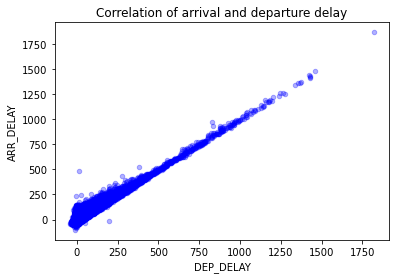

In [19]:
#Check if there is a relationship between the how late the flight leaves and how late the flight arrives
delays_df.plot(
               kind='scatter',
               x='DEP_DELAY',
               y='ARR_DELAY',
               color='blue',
               alpha=0.3,
               title='Correlation of arrival and departure delay'
              )
plt.show()

The scatter plot allows us to see there is no correlation between distance and arrival delay but there is a strong correlation between departure delay and arrival delay.


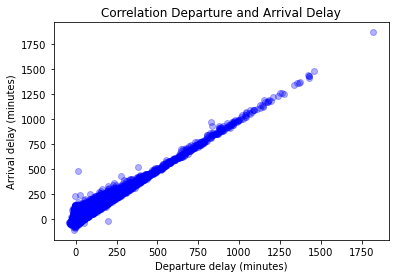

In [9]:
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Arrival delay (minutes)')
plt.title('Correlation Departure and Arrival Delay')
plt.scatter(x=delays_df['DEP_DELAY'],
           y=delays_df['ARR_DELAY'],
           color='blue', alpha=0.3)
plt.show()

In [22]:
# Grab our libaries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Remove rows with null values since those will crash our linear regression model training
delays_df.dropna(inplace=True)

# Move our features into the X DataFrame
X = delays_df.loc[:,['DEP_DELAY']]

# Move our labels into the y DataFrame
y = delays_df.loc[:,['ARR_DELAY']] 

# Split our data into test and training DataFrames
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42
                                                   )
regressor = LinearRegression()     # Create a scikit learn LinearRegression object
regressor.fit(X_train, y_train)    # Use the fit method to train the model using your training data

y_pred = regressor.predict(X_test)

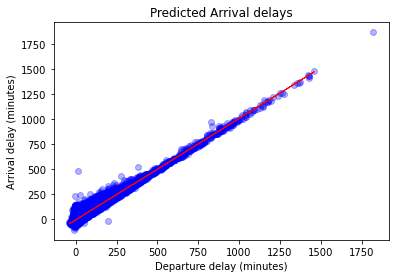

In [23]:
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Arrival delay (minutes)')
plt.title('Predicted Arrival delays')
plt.plot(
        X_test,
        y_pred,
        color='red',
        linewidth=1)
plt.scatter(x=delays_df['DEP_DELAY'],
           y=delays_df['ARR_DELAY'],
           color='blue', alpha=0.3)
plt.show()